In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\sneha\Downloads\Trade_DetailedTradeMatrix_E_All_Data\Trade_DetailedTradeMatrix_E_All_Data_NOFLAG.csv", encoding = 'latin1')

In [3]:
data = df.copy()

In [4]:
data = data[data['Element'] == 'Import Value'] #to work only with the import values

In [5]:
countries = [
   'Argentina', 'Australia', 'Austria',
       'Bolivia (Plurinational State of)', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Finland', 'France', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kenya', 'Lebanon', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands (Kingdom of the)', 'New Zealand',
       'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Republic of Korea',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Syrian Arab Republic', 'Thailand',
       'Trinidad and Tobago', 'Tunisia', 'Türkiye',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Uruguay',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Zimbabwe',
       'Afghanistan', 'Albania', 'Azerbaijan', 'Bahamas', 'Belarus',
       'Belize', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Congo', 'Cyprus',
       'Democratic Republic of the Congo', 'Estonia', 'Eswatini', 'Gabon',
       'Ghana', 'Guinea', 'Honduras', 'Iceland', 'Jordan', 'Kazakhstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lithuania',
       'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritius', 'Mozambique',
       'Namibia', 'Nepal', 'Nicaragua', 'North Macedonia',
       'Papua New Guinea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Rwanda', 'Saudi Arabia',
       'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Solomon Islands',
       'Tajikistan', 'Togo', 'Uganda', 'Ukraine',
       'United Republic of Tanzania', 'Zambia', 'Barbados',
       'Antigua and Barbuda', 'Central African Republic', 'Dominica',
       'Guyana', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Bangladesh', 'Senegal',
       'Bosnia and Herzegovina', 'Myanmar', 'Lesotho', 'Armenia',
       'Kuwait', 'Algeria', 'Niger', 'Brunei Darussalam', 'Comoros',
       'China, Macao SAR', 'Fiji', 'Gambia', 'Georgia', 'Mauritania',
       'New Caledonia', 'Sao Tome and Principe', 'Seychelles',
       'Sierra Leone', 'Suriname', 'Tonga', 'Yemen', 'Bahrain', 'Oman',
       'Vanuatu', 'Angola', 'Ethiopia', 'Kyrgyzstan', 'Maldives',
       'Mongolia', 'French Polynesia', 'Faroe Islands', 'Libya', 'Qatar',
       'Cook Islands', 'Kiribati', 'Cabo Verde', 'Bhutan', 'Samoa',
       'Tuvalu']

In [6]:
data = data[data['Reporter Countries'].isin(countries)]
data = data[data['Partner Countries'].isin(countries)]

In [7]:
years = [ 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
         'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
         'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
         'Y2020', 'Y2021']

#creating a dictionary to store DataFrames for each year
dfs_by_year = {}

for year in years:
    selected_columns = [  'Element', 'Unit', year, 'Reporter Country Code', 'Reporter Countries', 'Partner Country Code', 'Partner Countries']
    df_by_year = data[selected_columns]
    dfs_by_year[year] = df_by_year


for year in years:
    df_name = f"df{year[1:]}"  # Removing 'Y' from the year
    globals()[df_name] = dfs_by_year[year]

In [8]:
import pandas as pd

# Assuming you have data loaded in separate DataFrames named df_1995, df_1996, ..., df_2001

for year in range(1995, 2022):
    df_name = f"df{year}"
    globals()[df_name]['Relation'] = globals()[df_name][f'Y{year}'].apply(lambda x: 1 if x != 0 else 0)
    globals()[f'relation_{year}'] = globals()[df_name][['Reporter Countries', 'Partner Countries', 'Relation']]

C:\Users\sneha\AppData\Local\Temp\ipykernel_19060\291026737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['Relation'] = globals()[df_name][f'Y{year}'].apply(lambda x: 1 if x != 0 else 0)
C:\Users\sneha\AppData\Local\Temp\ipykernel_19060\291026737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df_name]['Relation'] = globals()[df_name][f'Y{year}'].apply(lambda x: 1 if x != 0 else 0)
C:\Users\sneha\AppData\Local\Temp\ipykernel_19060\291026737.py:7: SettingWithCopyWarning

In [9]:
import pandas as pd
import networkx as nx

# List of years to loop through
years = range(1995, 2022)

# Dictionary to store eigenvector centrality DataFrames
eigenvector_centralities = {}

for year in years:
    # Load your data for the current year
    df = globals()[f'df{year}']
    column_name = f'Y{year}'

    df_year = df[df[column_name] != 0]

    # Calculate total tradelinks for each reporter country
    total_tradelinks = df_year.groupby('Reporter Countries')['Relation'].sum()

    # Create a NetworkX graph from the DataFrame
    G = nx.from_pandas_edgelist(df_year, source='Reporter Countries', target='Partner Countries')

    # Calculate eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

    # Create a DataFrame to store eigenvector centrality
    eigenvector_centrality_df = pd.DataFrame(eigenvector_centrality.items(), columns=['Node', 'Eigenvector Centrality'])

    # Add total tradelinks as a column
    eigenvector_centrality_df['First Order'] = eigenvector_centrality_df['Node'].map(total_tradelinks)

    # Calculate total tradelinks of second-degree neighbors for each node
    eigenvector_centrality_df['Second Degree Tradelinks'] = eigenvector_centrality_df['Node'].apply(lambda node: sum(total_tradelinks.get(neighbor, 0) for neighbor in nx.single_source_shortest_path_length(G, node, cutoff=2).keys() if neighbor != node))

    # Add Year column
    eigenvector_centrality_df['Year'] = year

    # Store the DataFrame in the dictionary with the year as the key
    eigenvector_centralities[year] = eigenvector_centrality_df

# Concatenate all DataFrames into one DataFrame
eigenvector_centralities_all_years = pd.concat(eigenvector_centralities.values(), ignore_index=True)

# Display the updated DataFrame
print(eigenvector_centralities_all_years)


               Node  Eigenvector Centrality  First Order  \
0       Afghanistan                0.072369         3199   
1         Argentina                0.079998         6849   
2           Armenia                0.075481         6877   
3         Australia                0.081146        13271   
4           Austria                0.080442        16461   
...             ...                     ...          ...   
4720          Tonga                0.044338         2512   
4721         Tuvalu                0.033651          947   
4722          Samoa                0.048397         1847   
4723        Vanuatu                0.056203         3253   
4724  Faroe Islands                0.066670         3637   

      Second Degree Tradelinks  Year  
0                      1474978  1995  
1                      1471328  1995  
2                      1471300  1995  
3                      1464906  1995  
4                      1461716  1995  
...                        ...   ...  
4720  

In [10]:
eigenvector_centrality_df_1995 = eigenvector_centralities[1995]

eigenvector_centrality_df_1996 = eigenvector_centralities[1996]

eigenvector_centrality_df_1997 = eigenvector_centralities[1997]

eigenvector_centrality_df_1998 = eigenvector_centralities[1998]

eigenvector_centrality_df_1999 = eigenvector_centralities[1999]

eigenvector_centrality_df_2000 = eigenvector_centralities[2000]

eigenvector_centrality_df_2001 = eigenvector_centralities[2001]

eigenvector_centrality_df_2002 = eigenvector_centralities[2002]

eigenvector_centrality_df_2003 = eigenvector_centralities[2003]

eigenvector_centrality_df_2004 = eigenvector_centralities[2004]

eigenvector_centrality_df_2005 = eigenvector_centralities[2005]

eigenvector_centrality_df_2006 = eigenvector_centralities[2006]

eigenvector_centrality_df_2007 = eigenvector_centralities[2007]

eigenvector_centrality_df_2008 = eigenvector_centralities[2008]

eigenvector_centrality_df_2009 = eigenvector_centralities[2009]

eigenvector_centrality_df_2010 = eigenvector_centralities[2010]

eigenvector_centrality_df_2011 = eigenvector_centralities[2011]

eigenvector_centrality_df_2012 = eigenvector_centralities[2012]

eigenvector_centrality_df_2013 = eigenvector_centralities[2013]

eigenvector_centrality_df_2014 = eigenvector_centralities[2014]

eigenvector_centrality_df_2015 = eigenvector_centralities[2015]

eigenvector_centrality_df_2016 = eigenvector_centralities[2016]

eigenvector_centrality_df_2017 = eigenvector_centralities[2017]

eigenvector_centrality_df_2018 = eigenvector_centralities[2018]

eigenvector_centrality_df_2019 = eigenvector_centralities[2019]

eigenvector_centrality_df_2020 = eigenvector_centralities[2020]

eigenvector_centrality_df_2021 = eigenvector_centralities[2021]



In [11]:
eigenvector_centrality_df_2021

,Node,Eigenvector Centrality,First Order,Second Degree Tradelinks,Year
0,Afghanistan,0.071978,3023,1391917,2021
1,Argentina,0.080084,6844,1388096,2021
2,Armenia,0.075580,6222,1388718,2021
3,Australia,0.081235,13271,1381669,2021
4,Austria,0.080530,15018,1379922,2021
...,...,...,...,...,...
170,Tonga,0.044338,2512,1392428,2021
171,Tuvalu,0.033651,947,1393993,2021
172,Samoa,0.048397,1847,1393093,2021
173,Vanuatu,0.056203,3253,1391687,2021


In [12]:
eigenvector_centrality_df_2000

,Node,Eigenvector Centrality,First Order,Second Degree Tradelinks,Year
0,Afghanistan,0.072396,3199,1454366,2000
1,Argentina,0.080021,6525,1451040,2000
2,Armenia,0.075504,6697,1450868,2000
3,Australia,0.081170,12946,1444619,2000
4,Austria,0.080466,16484,1441081,2000
...,...,...,...,...,...
170,Tonga,0.045245,2305,1455260,2000
171,Tuvalu,0.033588,1067,1456498,2000
172,Samoa,0.048332,2002,1455563,2000
173,Vanuatu,0.056130,3565,1454000,2000


In [13]:
import pandas as pd

# List of years to loop through
years = range(1995, 2022)

# List to store eigenvector centrality DataFrames
eigenvector_centralities_dfs = []

for year in years:
    # Assuming you have eigenvector centrality DataFrames named eigenvector_centrality_1995, eigenvector_centrality_1996, ..., eigenvector_centrality_2022
    df_name = f"eigenvector_centrality_df_{year}"
    if df_name in globals():
        eigenvector_centralities_dfs.append(globals()[df_name])

# Concatenate all eigenvector centrality DataFrames into one DataFrame
eigenvector_centralities_long = pd.concat(eigenvector_centralities_dfs, axis=0, ignore_index=True)



In [14]:
eigenvector_centralities_long = eigenvector_centralities_long.sort_values(by = ['Node', 'Year'])

In [15]:
eigenvector_centralities_long

,Node,Eigenvector Centrality,First Order,Second Degree Tradelinks,Year
0,Afghanistan,0.072369,3199,1474978,1995
175,Afghanistan,0.072395,3199,1474159,1996
350,Afghanistan,0.072383,3199,1471213,1997
525,Afghanistan,0.072374,3199,1469688,1998
700,Afghanistan,0.072377,3199,1465475,1999
...,...,...,...,...,...
4004,Zimbabwe,0.077701,5508,1406717,2017
4179,Zimbabwe,0.078403,5501,1407235,2018
4354,Zimbabwe,0.078392,5526,1403517,2019
4529,Zimbabwe,0.078397,5525,1399401,2020


In [16]:
eigenvector_centralities_long.to_excel("C:\\Users\\sneha\\Downloads\\Tradelinks.xlsx")

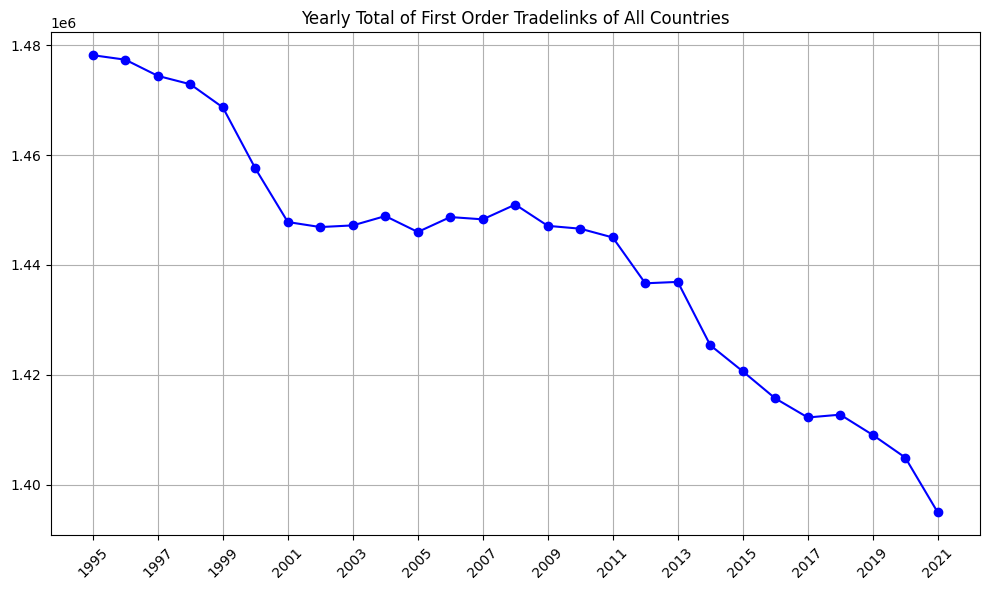

In [18]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['First Order'].sum().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of First Order Tradelinks of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

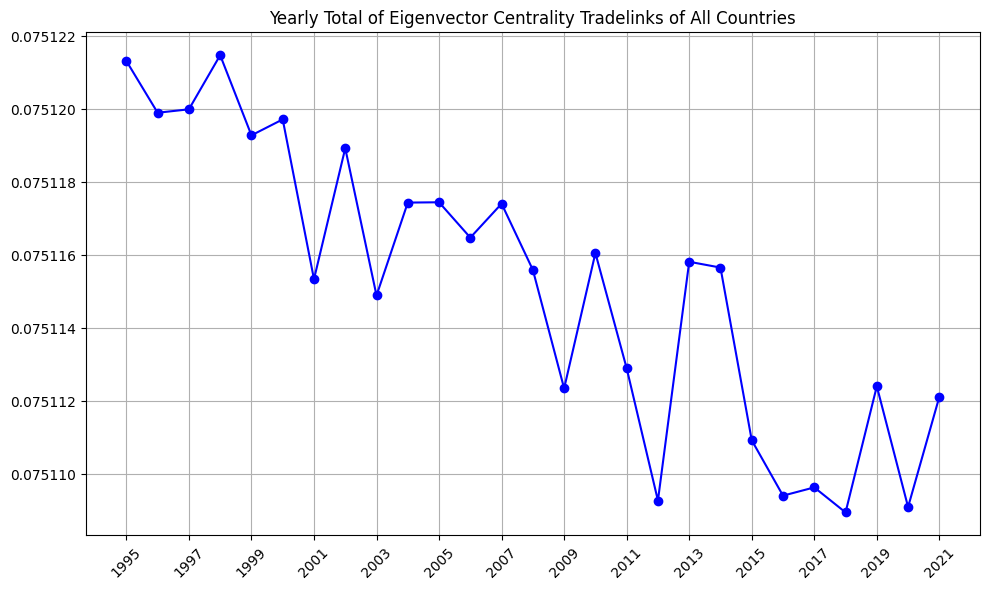

In [24]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['Eigenvector Centrality'].mean().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of Eigenvector Centrality Tradelinks of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

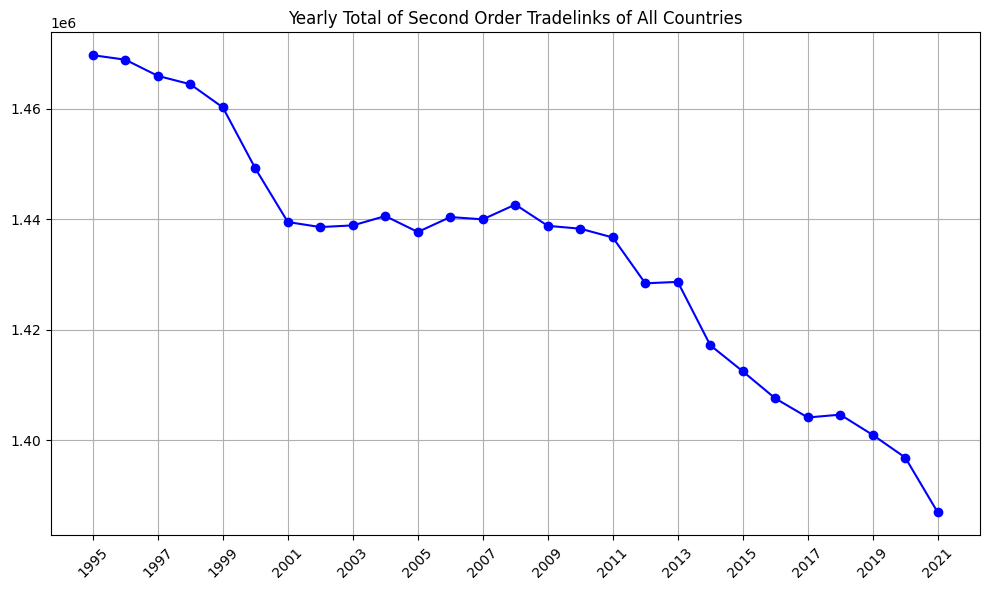

In [25]:
# FO TRADELINKS
import matplotlib.pyplot as plt

yearly_sum = eigenvector_centralities_long.groupby('Year')['Second Degree Tradelinks'].mean().reset_index()

yearly_sum.columns = ['Year', 'Total Value']

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Total Value'], marker='o', linestyle='-', color='b')
plt.title('Yearly Total of Second Order Tradelinks of All Countries')
plt.grid(True)

# Set xticks to show only alternative years and rotate them by 45 degrees
years = yearly_sum['Year']
plt.xticks(ticks=years[::2], labels=years[::2], rotation=45)

plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


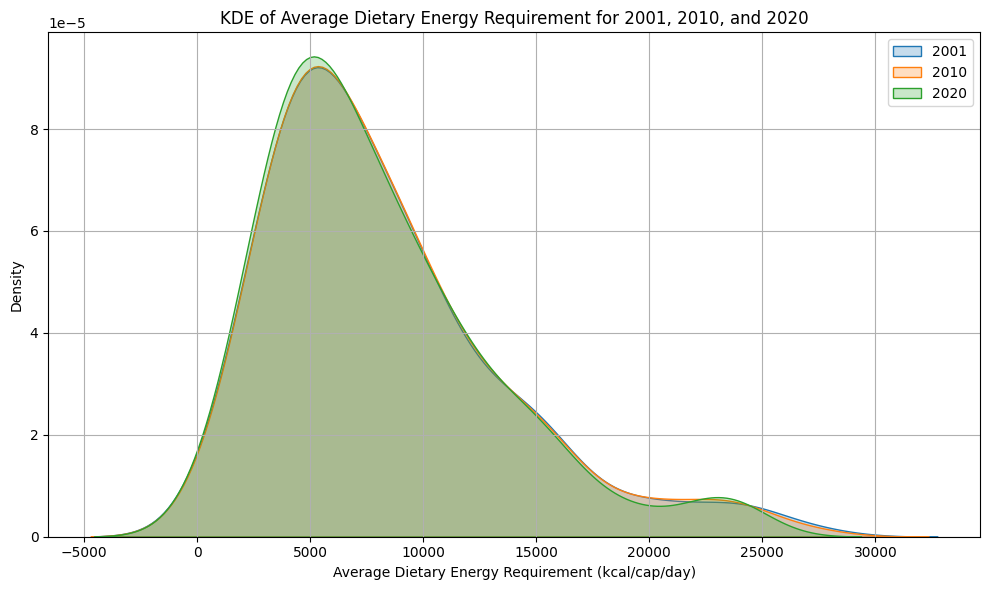

In [27]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2010, 2020])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['First Order'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2010]['First Order'], label='2010', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2020]['First Order'], label='2020', fill=True)

plt.title('KDE of Average Dietary Energy Requirement for 2001, 2010, and 2020')
plt.xlabel('Average Dietary Energy Requirement (kcal/cap/day)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


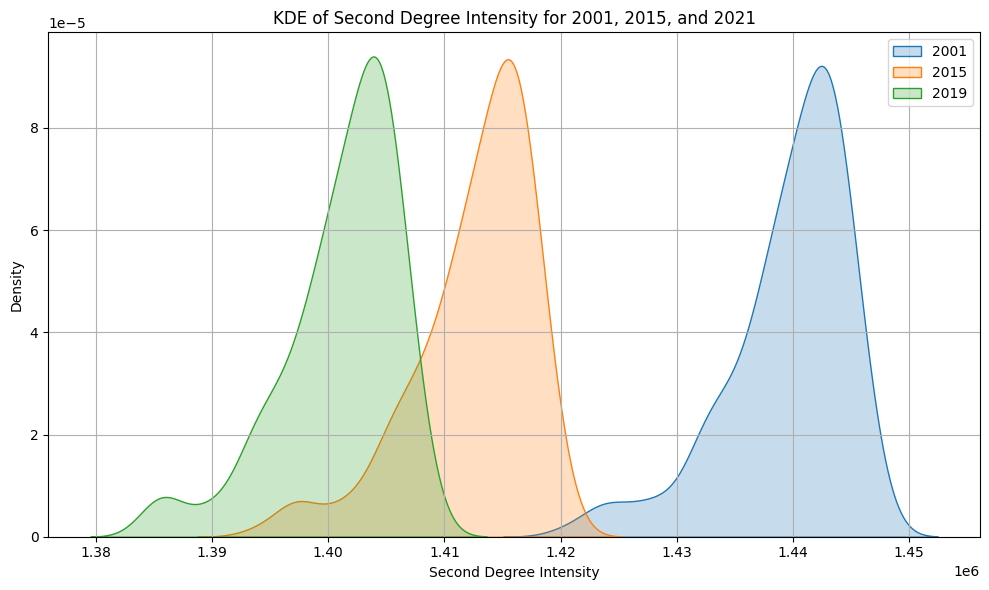

In [32]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2015, 2019])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['Second Degree Tradelinks'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2015]['Second Degree Tradelinks'], label='2015', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2019]['Second Degree Tradelinks'], label='2019', fill=True)

plt.title('KDE of Second Degree Intensity for 2001, 2015, and 2021')
plt.xlabel('Second Degree Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\.ipynb_checkpoints\.conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


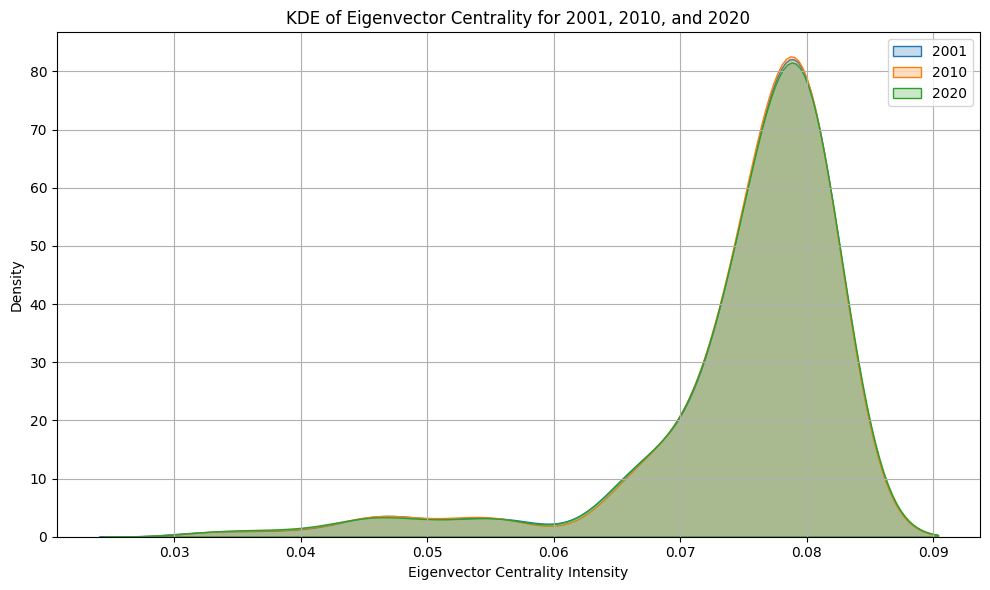

In [33]:
import seaborn as sns

# Assuming df is your DataFrame
# Filter for the years 2001, 2010, and 2020
df_filtered = eigenvector_centralities_long[eigenvector_centralities_long['Year'].isin([2001, 2010, 2020])]

# Plot KDEs for the specified years
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2001]['Eigenvector Centrality'], label='2001', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2010]['Eigenvector Centrality'], label='2010', fill=True)
sns.kdeplot(data=df_filtered[df_filtered['Year'] == 2020]['Eigenvector Centrality'], label='2020', fill=True)

plt.title('KDE of Eigenvector Centrality for 2001, 2010, and 2020')
plt.xlabel('Eigenvector Centrality Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()